### Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

&nbsp;

### Loading Dataset

In [2]:
filepath = os.getcwd() + "/tennis.csv"
df = pd.read_csv(filepath)
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


&nbsp;

### Descriptive Analysis

In [3]:
print(df.info())
print('\nNumber of missing values in given data')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook     14 non-null object
temp        14 non-null object
humidity    14 non-null object
windy       14 non-null bool
play        14 non-null object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes
None

Number of missing values in given data
outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64


&nbsp;

### Dummy Variables Creation<span style='background:yellow'>(Instead of direct categorical variable, sklearn library works with encoded category variables to find Entropy and I.G for best splits)</span>

In [4]:
df_dummy = pd.get_dummies(data = df, columns=['outlook','temp','humidity','windy'])
df_dummy.head()

,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,no,0,0,1,0,1,0,1,0,1,0
1,no,0,0,1,0,1,0,1,0,0,1
2,yes,1,0,0,0,1,0,1,0,1,0
3,yes,0,1,0,0,0,1,1,0,1,0
4,yes,0,1,0,1,0,0,0,1,1,0


&nbsp;

### Traing & Test split

In [5]:
X = df_dummy.drop('play',axis=1)
y = df_dummy['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

&nbsp;

### Hyperparameters Optimization

In [6]:
#create a dictionary of all values we want to test
param_grid = { 'criterion' : ['entropy','gini'],
               'max_depth' : np.arange(3,6),
               'max_features' : np.arange(3,5)
             }


#Decision Tree Model
dtree_model = DecisionTreeClassifier()

#Use gridsearch to test all possible parameters for best accuracy
dtree_gscv = GridSearchCV(dtree_model, param_grid = param_grid, cv = 5)

#Fit model to data
dtree_gscv.fit(X_train,y_train)

#GridSearch Results
print('Best parameters as per kfolds mean accuray : {}\n'.format(dtree_gscv.best_params_))
print('Mean accuray as per best parameters : {}\n'.format(dtree_gscv.best_score_))
print('GridSearch all parameters :')
print(dtree_gscv.cv_results_['params'],'\n')
print('GridSearch all parameters kfolds mean accuracy:')
print(dtree_gscv.cv_results_['mean_test_score'])

Best parameters as per kfolds mean accuray : {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3}

Mean accuray as per best parameters : 0.7777777777777778

GridSearch all parameters :
[{'criterion': 'entropy', 'max_depth': 3, 'max_features': 3}, {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4}, {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3}, {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4}, {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3}, {'criterion': 'entropy', 'max_depth': 5, 'max_features': 4}, {'criterion': 'gini', 'max_depth': 3, 'max_features': 3}, {'criterion': 'gini', 'max_depth': 3, 'max_features': 4}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 3}, {'criterion': 'gini', 'max_depth': 4, 'max_features': 4}, {'criterion': 'gini', 'max_depth': 5, 'max_features': 3}, {'criterion': 'gini', 'max_depth': 5, 'max_features': 4}] 

GridSearch all parameters kfolds mean accuracy:
[0.77777778 0.44444444 0.55555556 0.5555555

&nbsp;

### Best Model parameters as per Gridsearch_cv 

In [7]:
#Decision Tree Model 
dtree = DecisionTreeClassifier(criterion='entropy', max_depth = 4, max_features = 3 )
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

&nbsp;

### Model Fit

In [8]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

&nbsp;

### Trained Decision Tree Visualization

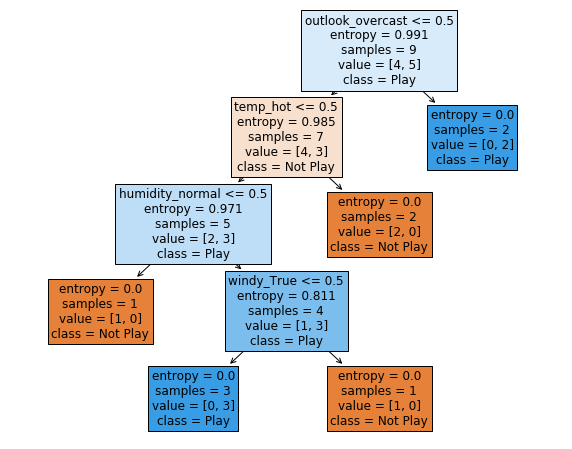

In [9]:
fig = plt.figure(figsize=(10,8))
a = plot_tree(dtree, feature_names=X_train.columns, fontsize=12, filled=True, class_names=['Not Play', 'Play'])#Because in our data 1st class label is not play in resp. variable
plt.show()

&nbsp;

#### Key Point :
> * Node colour get assigned as per each class label. i.e., orange - not play class, blue - play class. 
> * Higher the class label counts and then colour would be dominating class label one for node.
> * more pure/dominating node with labels more thicker the colour
> * Node with same proportion of labels count, then by default colour of the node would be white.

&nbsp;

### Model Performance

In [50]:
print("X_train sample counts : {}".format(len(X_train)))
print("y_test sample counts : {}\n".format(len(X_test)))

y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}\n'.format(count_misclassified))

confusion = metrics.confusion_matrix(y_test,y_pred)

print('Confusion Matrix:')
print(confusion,'\n')
sensitivity = confusion[1][1]/float(confusion[1:].sum())
specificity = confusion[0][0]/float(confusion[:,0].sum())
specificity_ = confusion[0][1]/float(confusion[:,0].sum()) 
print("The accuracy (TP+TN)/total : {0:.3f}\n".format(accuracy))
print("The sensitivity (TP/TP+FN) | TPR : {0:.3f}\n".format(sensitivity))
print("The specificity (TN/TN+FP) : {0:.3f}\n".format(specificity))
print("The 1-specificity (FP/TN+FP) | FPR : {0:.3f}\n".format(specificity_))

#Confusion Matrix is calculated as below: compare with below actuals in y_test and y_pred
#          Predict
#           0   1
#           
#        0  TN(1)   FP(0)
# Actual
#        1  FN(2)   TP(2)

X_train sample counts : 9
y_test sample counts : 5

Misclassified samples: 2

Confusion Matrix:
[[1 0]
 [2 2]] 

The accuracy (TP+TN)/total : 0.600

The sensitivity (TP/TP+FN) | TPR : 0.500

The specificity (TN/TN+FP) : 0.333

The 1-specificity (FP/TN+FP) | FPR : 0.000



&nbsp;

### Model Probabilities

In [51]:
probs = dtree.predict_proba(X_test)
print('Probabilities on y_test : {}\n'.format(probs.tolist()))
print('if pred. value is \'yes\' then prob. is [0.0, 1.0], if pred. value is \'no\' the prob. is [1.0, 0.0]\n')
print('Actual y_test value : {}\n'.format(y_test.tolist()))
print('Predictions on y_test : {}\n'.format(y_pred.tolist()))
probs = probs[:, 1]
print('As AUC_ROC mainly of postive cases, we take postive case probablities : {}\n'.format(probs))

Probabilities on y_test : [[0.0, 1.0], [0.0, 1.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0]]

if pred. value is 'yes' then prob. is [0.0, 1.0], if pred. value is 'no' the prob. is [1.0, 0.0]

Actual y_test value : ['yes', 'yes', 'yes', 'no', 'yes']

Predictions on y_test : ['yes', 'yes', 'no', 'no', 'no']

As AUC_ROC mainly of postive cases, we take postive case probablities : [1. 1. 0. 0. 0.]



&nbsp;

### AUC value<span style='background:yellow'>(on y_test and y_pred postive probablities for calculating TPR and FPR)</span>

In [52]:
#Its calculating area under the roc curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.75


&nbsp;

### Getting TPR,FPR calculated based on postive y_pred probablities and it selects few optimal thresholds for better curve

In [54]:
y_test_1 = [1 if i == 'yes' else 0 for i in y_test]
print(y_test.tolist())
print(y_test_1)
print(probs)
fpr, tpr, thresholds = roc_curve(y_test_1, probs)
print(fpr,tpr)
print(thresholds)

['yes', 'yes', 'yes', 'no', 'yes']
[1, 1, 1, 0, 1]
[1. 1. 0. 0. 0.]
[0. 0. 1.] [0.  0.5 1. ]
[2. 1. 0.]


&nbsp;

### Visualizing ROC curve

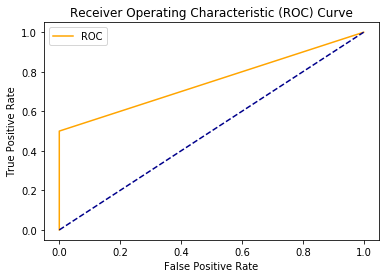

In [28]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

### Take Away Points :
> * More the orange curve steeve towards TPR and away from random blue line, better the model performance in calculating tpr and fpr.
> * Lesser(ex: 0 in our case) the threshold, tpr and fpr value data point is (1,1). Both tpr & fpr is high
> * Higher(ex: 2 in our case) the threshold, tpr and fpr value data point is (0,0). Both tpr & fpr is less
> * Model i.e., orange showing better that is steeving towards tpr on some threshold value(1) rather than below or on random line i.e., blue